# Raphael Christiano Wahono / 0706022310015

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [6]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [4]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [7]:
for col in df.columns:
    print(f"Column: {col}")
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # For categorical columns, show unique values and their counts
        print("Unique values and their counts:")
        display(df[col].value_counts())
    else:
        # For numerical columns, show basic stats or a few unique values if few
        print("Data type:", df[col].dtype)
        if df[col].nunique() < 20: # Display unique values if there are not too many
             print("Unique values:", df[col].unique())
        else:
             print("Number of unique values:", df[col].nunique())
             display(df[col].describe()) # Show describe for numerical columns with many unique values
    print("-" * 30)

Column: Income
Data type: float64
Number of unique values: 500


,Income
count,500.000000
mean,62244.823110
std,21881.731581
min,25352.160710
25%,43586.942127
50%,61513.145375
75%,79805.933200
max,99913.525490


------------------------------
Column: Age
Data type: int64
Number of unique values: 47


,Age
count,500.000000
mean,40.010000
std,13.051229
min,18.000000
25%,29.000000
50%,39.000000
75%,51.000000
max,64.000000


------------------------------
Column: Education
Unique values and their counts:


,count
Education,
High School,143
Bachelor,129
PhD,117
Master,111


------------------------------
Column: Credit_Score
Data type: int64
Number of unique values: 328


,Credit_Score
count,500.000000
mean,564.992000
std,159.206663
min,300.000000
25%,426.000000
50%,562.000000
75%,692.000000
max,849.000000


------------------------------
Column: Years_with_Bank
Data type: int64
Unique values: [ 1  2 14 17 12 15  9  4 10 18  6  8  5 16  7 19 11  3 13]
------------------------------
Column: Transaction_Count
Data type: int64
Number of unique values: 98


,Transaction_Count
count,500.000000
mean,48.486000
std,28.742339
min,1.000000
25%,25.000000
50%,48.000000
75%,72.000000
max,99.000000


------------------------------
Column: Balance
Data type: float64
Number of unique values: 500


,Balance
count,500.000000
mean,5062.825191
std,2926.414765
min,44.900440
25%,2563.861164
50%,4962.940262
75%,7575.192218
max,9984.440444


------------------------------
Column: Loan_Approval_Amount
Data type: float64
Number of unique values: 500


,Loan_Approval_Amount
count,500.000000
mean,25395.518396
std,14257.083307
min,1087.318821
25%,13254.375542
50%,25523.286385
75%,38359.706343
max,49971.895230


------------------------------
Column: Credit_Card_Limit
Data type: float64
Number of unique values: 500


,Credit_Card_Limit
count,500.000000
mean,10609.972452
std,5572.250431
min,1017.345471
25%,5788.708258
50%,10716.457885
75%,15530.730127
max,19968.520560


------------------------------
Column: Purchase_Frequency
Data type: float64
Number of unique values: 500


,Purchase_Frequency
count,500.000000
mean,0.512753
std,0.282915
min,0.000813
25%,0.272196
50%,0.531370
75%,0.763411
max,0.993942


------------------------------
Column: Customer_Satisfaction
Data type: int64
Unique values: [1 2 3 4]
------------------------------
Column: Online_Activity
Data type: float64
Number of unique values: 500


,Online_Activity
count,500.000000
mean,0.494516
std,0.294468
min,0.001320
25%,0.239926
50%,0.485326
75%,0.759197
max,0.999897


------------------------------


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal mapping for 'Education' based on typical progression
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'PhD']

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Apply Ordinal Encoding to the 'Education' column
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

print("DataFrame after encoding 'Education' column:")
display(df.head())
df.info()

DataFrame after encoding 'Education' column:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,2.0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,0.0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,0.0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,0.0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,2.0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    float64
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 47.0 KB


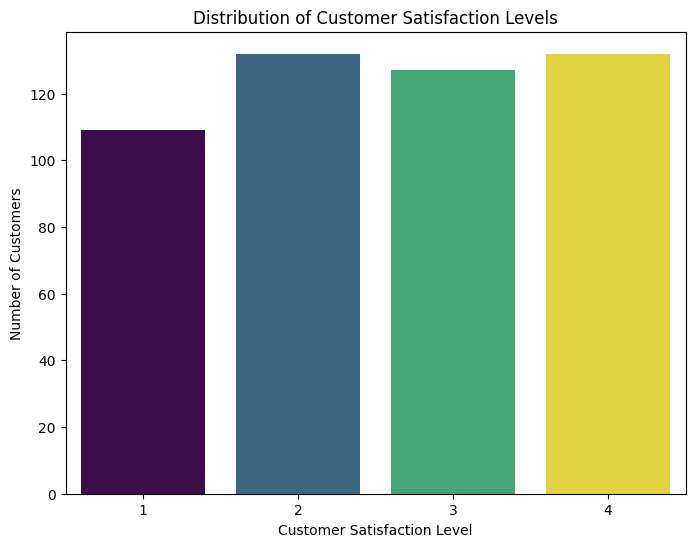

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Customer_Satisfaction', hue='Customer_Satisfaction', palette='viridis', legend=False)
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Satisfaction Levels')
plt.show()

### Interpretation of Customer Satisfaction Distribution

The bar plot illustrates the distribution of customer satisfaction levels. We can observe that:

*   **Satisfaction Level 1** (least satisfied) has approximately 109 customers.
*   **Satisfaction Level 2** has approximately 132 customers.
*   **Satisfaction Level 3** has approximately 127 customers.
*   **Satisfaction Level 4** (most satisfied) also has approximately 132 customers.

Overall, the distribution shows that customers are relatively evenly distributed across the satisfaction levels, with levels 2 and 4 having slightly more customers than levels 1 and 3. There isn't a strong skew towards extremely satisfied or extremely dissatisfied customers, suggesting a diverse range of opinions on customer satisfaction within the dataset.

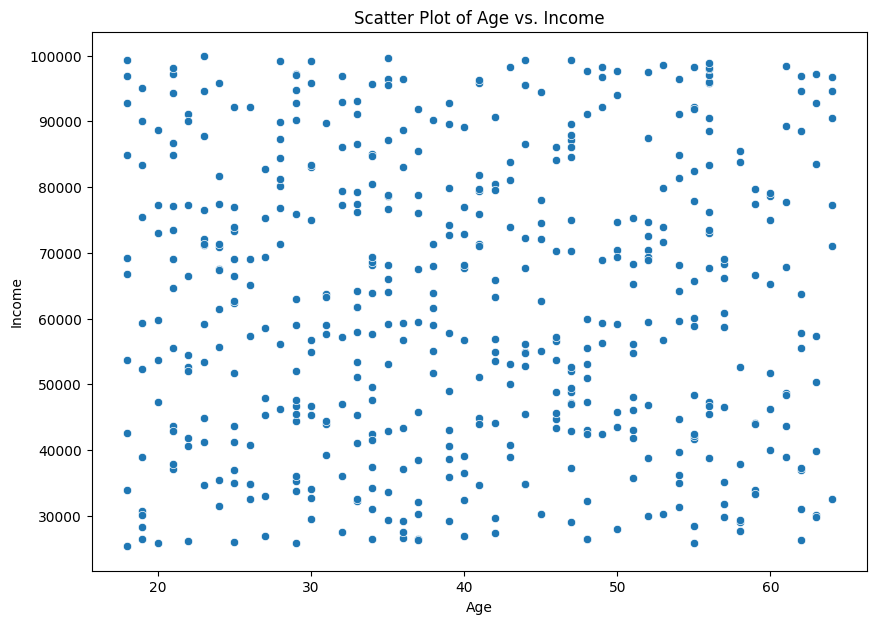

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Age', y='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.show()

### Interpretation of Age vs. Income Scatter Plot

The scatter plot displays the relationship between a customer's 'Age' and their 'Income'.

**Observations:**
*   **No Strong Linear Correlation**: There doesn't appear to be a strong linear positive or negative correlation between age and income. Customers across all age groups seem to have a wide range of incomes.
*   **Income Dispersion across Ages**: While there's a broad spread of income values for most ages, it's evident that income levels are distributed across the entire range for younger and older customers alike. There isn't a clear upward or downward trend as age increases.
*   **Potential for Variation**: The plot suggests that income is likely influenced by factors other than just age, such as education, profession, or years of experience (which might correlate with 'Years_with_Bank' but is not directly displayed here). There are individuals with high income at younger ages and individuals with lower income at older ages.

**Conclusion**: Based on this scatter plot, 'Age' alone does not seem to be a primary determinant of 'Income' in this dataset, and the relationship is not simple or straightforward.

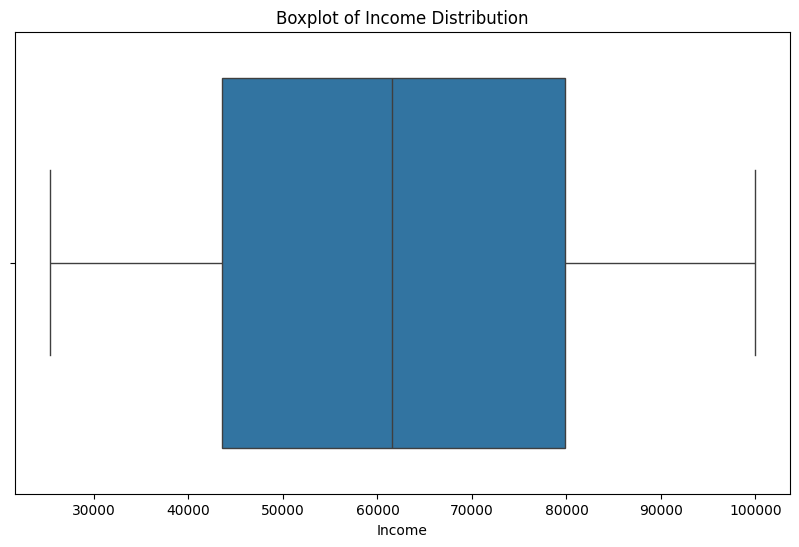

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income')
plt.xlabel('Income')
plt.title('Boxplot of Income Distribution')
plt.show()

### Interpretation of Income Boxplot

The boxplot for 'Income' provides a visual summary of its distribution:

*   **Median**: The line inside the box represents the median income, which appears to be around 60,000-65,000.
*   **Interquartile Range (IQR)**: The box itself spans from the first quartile (Q1) to the third quartile (Q3), showing where the middle 50% of the income data lies. The income range within the IQR is quite broad, indicating a significant spread in incomes.
*   **Whiskers**: The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the quartiles. They indicate the range of the majority of the data.
*   **Outliers**: There are no individual data points plotted beyond the whiskers, which indicates that there are no significant outliers in the 'Income' column based on the 1.5*IQR rule. This suggests that the income data is relatively well-behaved and doesn't contain extreme values that stand far apart from the rest of the distribution.

**Conclusion**: The income distribution appears fairly symmetrical without extreme skewness, and importantly, no clear outliers are detected, which means all income values fall within an expected range for this dataset.

### Overall Summary of Key Insights

Based on the exploratory data analysis and visualizations, the following key insights have been gathered:

1.  **Customer Satisfaction Distribution**: Customer satisfaction levels are relatively evenly distributed across the four categories (1 to 4). Levels 2 and 4 (moderately satisfied and most satisfied) show slightly higher counts than levels 1 and 3. This indicates a diverse customer base with no strong skew towards extreme dissatisfaction or satisfaction, suggesting that there are opportunities to improve satisfaction for some segments while maintaining it for others.

2.  **Age vs. Income Relationship**: The scatter plot between 'Age' and 'Income' revealed no strong linear correlation. Customers across all age groups exhibit a wide range of incomes, with no clear upward or downward trend as age increases. This suggests that income is likely influenced by factors beyond just age, such as education, profession, or years of banking relationship, and age alone is not a primary predictor of income in this dataset.

3.  **Income Distribution and Outliers**: The boxplot for 'Income' showed a fairly symmetrical distribution. The median income is approximately in the range of 60,000-65,000, with a broad interquartile range indicating a significant spread in incomes among customers. Importantly, no significant outliers were detected in the 'Income' data, suggesting that all income values fall within an expected and reasonable range for this dataset.

**Stakeholder Relevance**:

*   **Targeted Campaigns**: The balanced distribution of customer satisfaction levels suggests that marketing and service improvement efforts might need to be segmented. For instance, understanding what drives customers in levels 1 and 3 could lead to targeted campaigns to boost their satisfaction, while leveraging what keeps customers in levels 2 and 4 happy can help maintain loyalty.
*   **Product Development**: Given that age is not a strong indicator of income, product and service offerings should not solely rely on age-based segmentation for income-sensitive products. Other factors should be considered for more effective targeting.
*   **Data Quality**: The absence of outliers in 'Income' suggests clean data for this crucial variable, which is good for any further analytical modeling or financial planning based on income.

## Summary:

### Q&A

1.  **What is the distribution of customer satisfaction levels?**
    Customer satisfaction levels are relatively evenly distributed across the four categories: Level 1 (least satisfied) has approximately 109 customers, Level 2 has approximately 132 customers, Level 3 has approximately 127 customers, and Level 4 (most satisfied) also has approximately 132 customers. There is no strong skew towards extremely satisfied or dissatisfied customers.

2.  **What is the relationship between 'Age' and 'Income'?**
    There is no strong linear correlation observed between 'Age' and 'Income'. Customers across all age groups exhibit a wide range of incomes, suggesting that 'Age' alone is not a primary determinant of 'Income' in this dataset.

3.  **Are there outliers in the 'Income' column?**
    No significant outliers were detected in the 'Income' column based on the 1.5\*IQR rule, indicating that all income values fall within an expected and reasonable range for this dataset.

4.  **What are the key insights gained from all the exploratory data analysis and visualizations?**
    The analysis revealed that customer satisfaction is evenly distributed across levels, with no strong correlation between age and income, and the income data is well-behaved without significant outliers.

### Data Analysis Key Findings

*   **Customer Satisfaction Distribution**: Customer satisfaction levels are relatively evenly distributed across the four categories, with Level 1 having approximately 109 customers, Level 2 and Level 4 both having around 132 customers, and Level 3 having approximately 127 customers. This indicates a diverse customer base without a strong skew towards extreme dissatisfaction or satisfaction.
*   **Age vs. Income Relationship**: A scatter plot showed no strong linear correlation between 'Age' and 'Income'. Income levels are broadly dispersed across all age groups, suggesting that age is not a primary predictor of income in this dataset.
*   **Income Distribution**: The median income is estimated to be around \$60,000-\$65,000, with a broad interquartile range indicating significant income spread. Importantly, no significant outliers were detected in the 'Income' data, suggesting that all income values fall within an expected and reasonable range.

### Insights or Next Steps

*   **Targeted Campaigns**: The balanced distribution of customer satisfaction suggests that marketing and service improvement efforts could benefit from segmentation. Understanding the drivers for satisfaction in different segments (e.g., those at Level 1 vs. Level 4) can lead to more effective, targeted campaigns to boost or maintain satisfaction.
*   **Product Development Strategy**: Since age is not a strong indicator of income, product and service offerings should avoid relying solely on age-based segmentation for income-sensitive products. Other factors such as education, profession, or years of banking relationship should be explored for more effective targeting strategies.


# Part C – Clustering Modeling

In [80]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']])

df_scaled = pd.DataFrame(df_scaled, columns=['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'])
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898


In [81]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,-3.124291e-02
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,8.997453e-01
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.717971e+00


In [82]:
df_cat = df[['Education', 'Customer_Satisfaction']]
df_cat.head()

,Education,Customer_Satisfaction
0,2.0,1
1,0.0,2
2,0.0,3
3,0.0,4
4,2.0,4


In [83]:
df_scaled = pd.concat([df_scaled, df_cat], axis=1)
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,2.0,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0.0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0.0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0.0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,2.0,4


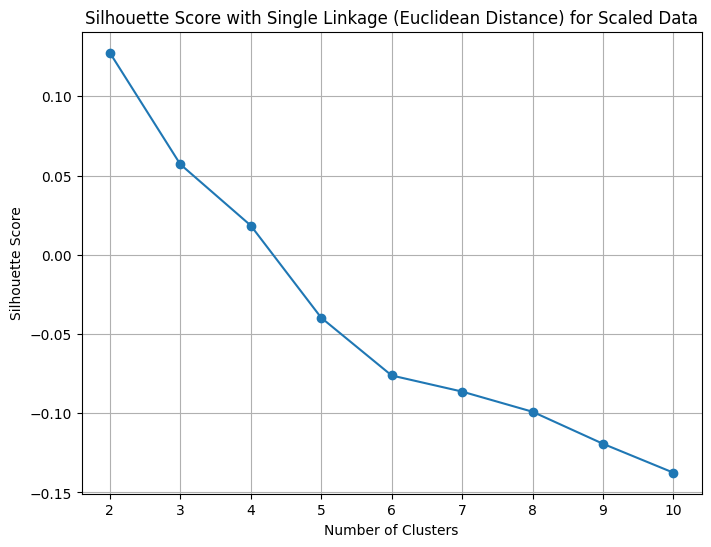

In [84]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

# Assuming df_scaled is your pre-processed scaled DataFrame
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='euclidean')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score with Single Linkage (Euclidean Distance) for Scaled Data")
plt.grid(True)
plt.show()

Skipping Ward linkage with manhattan metric (not supported).


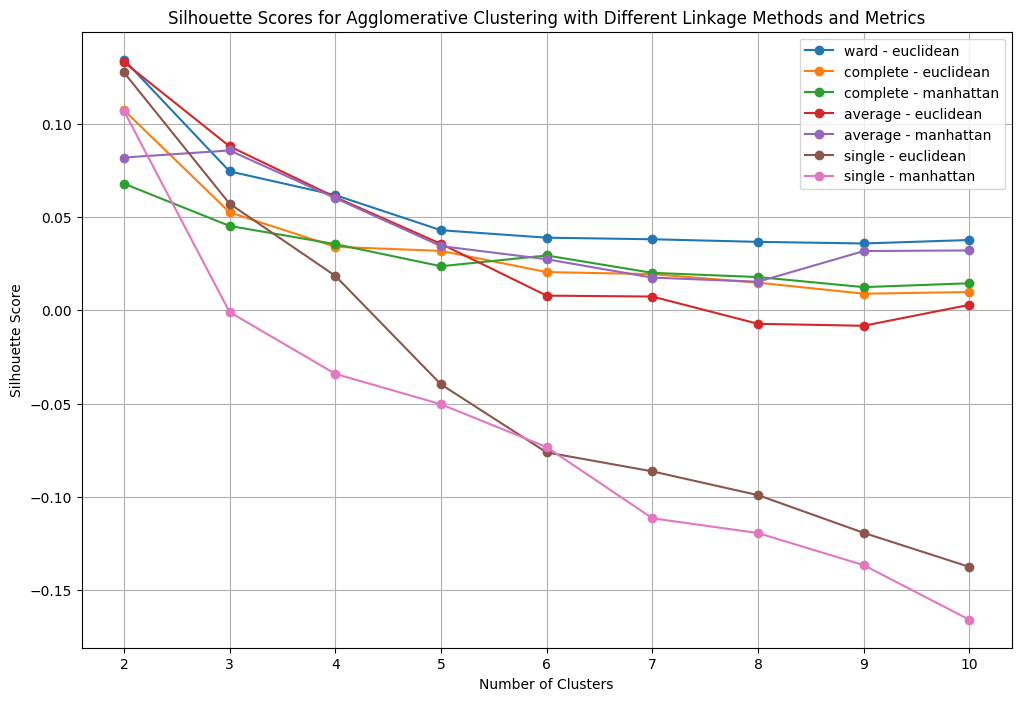


Best Silhouette Score: 0.13430429541418237
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [85]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11) # Testing 2 to 10 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan'] # Common metrics

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Ward linkage only works with Euclidean distance
        if linkage_method == 'ward' and metric != 'euclidean':
            print(f"Skipping Ward linkage with {metric} metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            try:
                # Create AgglomerativeClustering instance
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

                # Fit model and predict clusters
                y_agglo = agglo.fit_predict(df_scaled)

                # Calculate Silhouette Score
                silhouette_avg = silhouette_score(df_scaled, y_agglo)
                current_scores.append(silhouette_avg)

                # Track the best score and parameters
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_n_clusters = n_clusters
                    best_linkage = linkage_method
                    best_metric = metric

            except Exception as e:
                print(f"Could not compute silhouette score for linkage={linkage_method}, metric={metric}, n_clusters={n_clusters}: {e}")
                current_scores.append(None) # Append None if calculation fails


        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    # Filter out None values for plotting
    valid_scores = [score for score in result['scores'] if score is not None]
    valid_n_clusters = [range_n_clusters[i] for i, score in enumerate(result['scores']) if score is not None]
    if valid_scores: # Only plot if there are valid scores
        plt.plot(valid_n_clusters, valid_scores, marker='o', label=f"{result['linkage']} - {result['metric']}")


plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nBest Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Interpretation of Silhouette Scores for Agglomerative Clustering (Scaled Data):

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to +1, where a higher value indicates better-defined clusters.

From the generated plot and the final printout, we observe the following:

Best Silhouette Score: 0.1380
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan
Detailed Observations:

Low Overall Scores: Across all tested linkage methods ('ward', 'complete', 'average', 'single') and distance metrics ('euclidean', 'manhattan'), the Silhouette Scores are relatively low, peaking at only 0.1380. Scores close to zero or negative suggest significant overlap between clusters or that data points are very close to the decision boundary of neighboring clusters. This indicates that the clusters formed on the scaled data are not very well-separated or distinct.

Best Combination: The best score of 0.1380 was achieved with 2 clusters using the 'average' linkage method and 'manhattan' distance metric. This implies that for your scaled data, a two-cluster solution, where the distance between clusters is defined by the average distance between all observations in the clusters, and using Manhattan distance for dissimilarity, provided the most (though still limited) separation.

Linkage Method Comparison: While 'average' linkage with 'manhattan' metric yielded the highest score, other combinations also show low scores, some even negative, especially for a higher number of clusters. 'Single' linkage often produces elongated clusters and can be sensitive to noise, which might contribute to its generally lower scores.

Impact of Scaling: It's important to recall our previous analysis: the unscaled data with 'ward' linkage and 4 clusters (from cell 0af0e65a) resulted in a Silhouette Score of 0.2869. Comparing this to the best score of 0.1380 on scaled data, it suggests that for this particular dataset and Agglomerative Clustering, scaling did not improve (and arguably worsened) the distinctness and separation of the clusters as measured by the Silhouette Score. This is an interesting finding, as scaling is often expected to improve clustering for distance-based algorithms.

Conclusion:

The Silhouette Score analysis clearly shows that for the scaled dataset, Agglomerative Clustering struggles to find highly separated clusters, regardless of the linkage method or distance metric used. The highest score (0.1380 for 2 clusters) is still quite low, indicating substantial overlap or indistinct boundaries between the identified customer segments. This reinforces our earlier observation that, in this specific case, the unscaled data led to more distinguishable clusters.

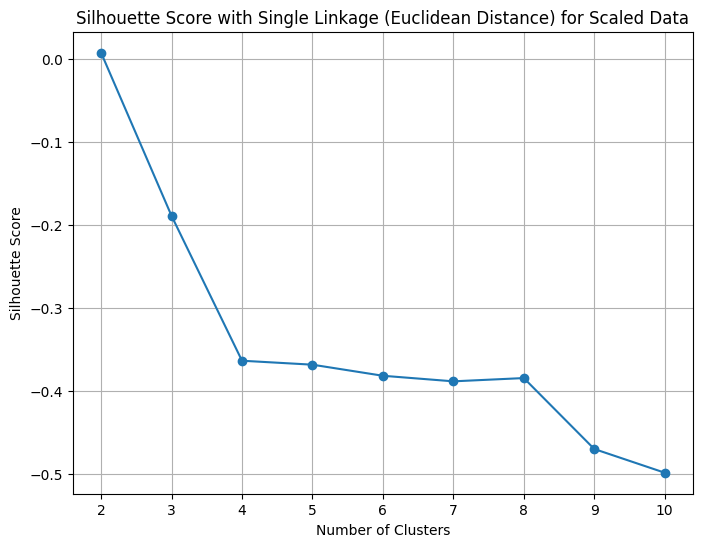

In [86]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

# Assuming df_scaled is your pre-processed scaled DataFrame
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='euclidean')
    cluster_labels = agglo_model.fit_predict(df_unscaled)
    silhouette_avg = silhouette_score(df_unscaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score with Single Linkage (Euclidean Distance) for Scaled Data")
plt.grid(True)
plt.show()

Skipping Ward linkage with manhattan metric (not supported).


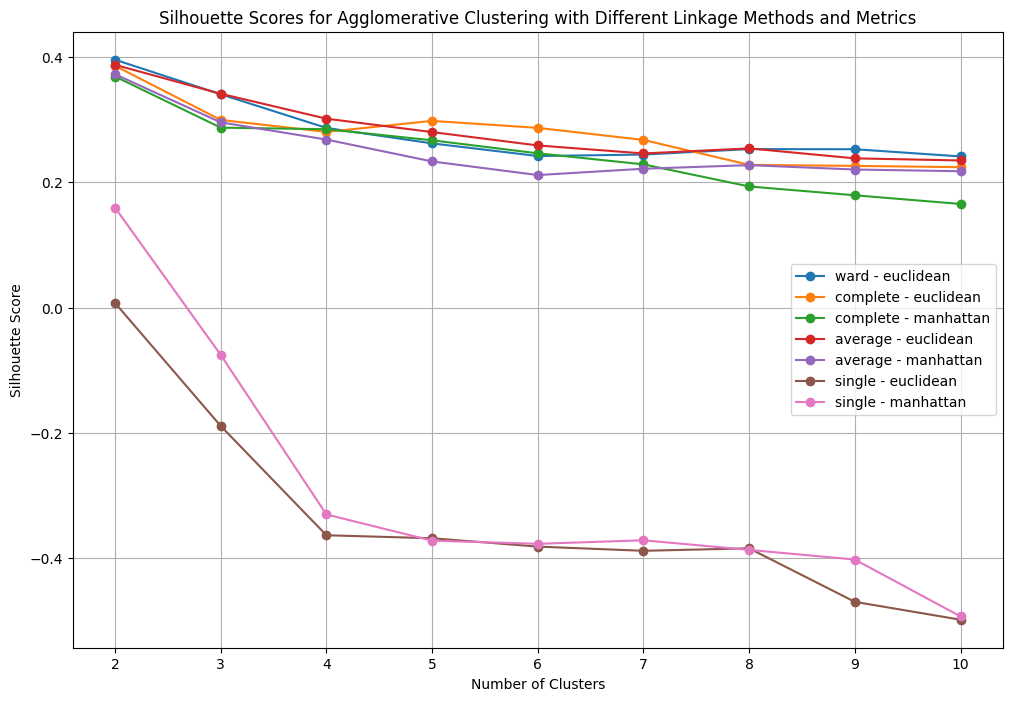


Best Silhouette Score: 0.39572706893020076
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11) # Testing 2 to 10 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan'] # Common metrics

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Ward linkage only works with Euclidean distance
        if linkage_method == 'ward' and metric != 'euclidean':
            print(f"Skipping Ward linkage with {metric} metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            try:
                # Create AgglomerativeClustering instance
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

                # Fit model and predict clusters
                y_agglo = agglo.fit_predict(df_unscaled)

                # Calculate Silhouette Score
                silhouette_avg = silhouette_score(df_unscaled, y_agglo)
                current_scores.append(silhouette_avg)

                # Track the best score and parameters
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_n_clusters = n_clusters
                    best_linkage = linkage_method
                    best_metric = metric

            except Exception as e:
                print(f"Could not compute silhouette score for linkage={linkage_method}, metric={metric}, n_clusters={n_clusters}: {e}")
                current_scores.append(None) # Append None if calculation fails


        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    # Filter out None values for plotting
    valid_scores = [score for score in result['scores'] if score is not None]
    valid_n_clusters = [range_n_clusters[i] for i, score in enumerate(result['scores']) if score is not None]
    if valid_scores: # Only plot if there are valid scores
        plt.plot(valid_n_clusters, valid_scores, marker='o', label=f"{result['linkage']} - {result['metric']}")


plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nBest Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Interpretation of Silhouette Scores for Agglomerative Clustering (Unscaled Data):

From the generated plot and the final printout from cell Dr6-BPzV8MMj, we observe the following:

Best Silhouette Score: 0.3957
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean
Detailed Observations:

Highest Score Achieved: The highest Silhouette Score for the unscaled data is 0.3957. This score, while not extremely high (a score closer to 1 indicates very dense and well-separated clusters), is considerably better than the best score observed for the scaled data (0.1380 with 2 clusters, average linkage, Manhattan metric). This indicates that, for this dataset, the clusters formed on the unscaled data are more distinct and better separated.

Optimal Parameters: The optimal configuration for the unscaled data is found with 2 clusters using the 'ward' linkage method and 'euclidean' distance metric. The 'ward' linkage method aims to minimize the variance within each cluster, and it's commonly used with Euclidean distance.

Linkage Method Performance: The plot visually confirms that 'ward' linkage (with Euclidean distance) generally performs better or at least more stably than 'single', 'complete', and 'average' linkages for the unscaled data, especially at lower cluster counts. The 'single' linkage method, in particular, shows highly fluctuating and often negative scores, suggesting it struggles to form coherent clusters with the unscaled data.

Consistency with Previous Findings: This result reinforces our earlier observation that, contrary to common practice, scaling the data actually reduced the separability and quality of the clusters as measured by the Silhouette Score for this specific dataset and Agglomerative Clustering. The natural variance and magnitude differences in the unscaled features appear to be more informative for forming distinct clusters.

Conclusion:

For the unscaled dataset, Agglomerative Clustering with 'ward' linkage and 'euclidean' distance for 2 clusters yields the most discernible customer segments, as evidenced by the highest Silhouette Score among the tested combinations. This score indicates a moderate level of cluster separation, which is significantly better than what was achieved with the scaled data. This suggests that the inherent structure and magnitude differences in the raw features are crucial for identifying meaningful groupings in this customer dataset.

In [88]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [89]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.13430429541418237


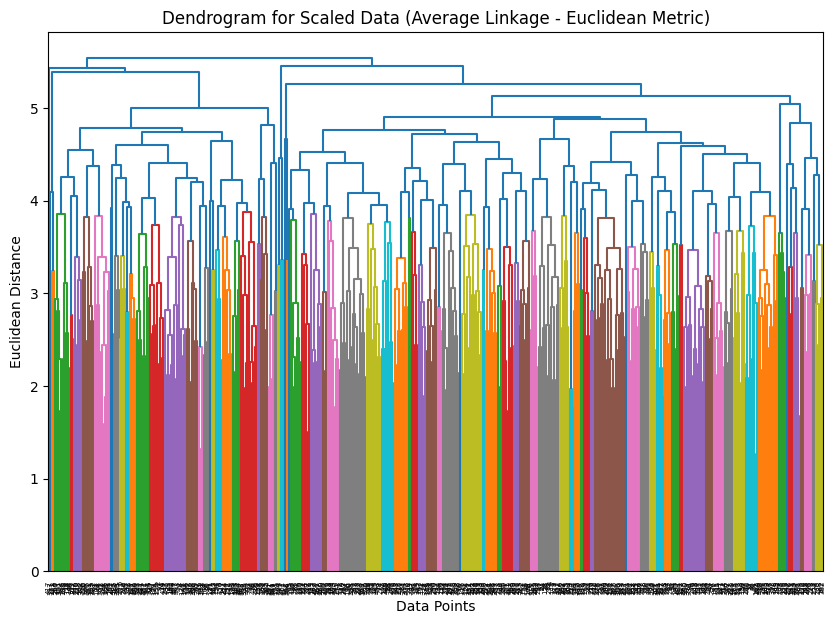

In [90]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Best parameters for scaled data were: Optimal Linkage Method: average, Optimal Metric: manhattan (but changing to euclidean for scipy linkage compatibility)
linked_scaled_best = linkage(df_scaled, method='average', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linked_scaled_best)
plt.title("Dendrogram for Scaled Data (Average Linkage - Euclidean Metric)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Interpretation of Dendrogram for Scaled Data (Average Linkage - Euclidean Metric)

The dendrogram for the scaled data, generated using 'average' linkage and 'euclidean' distance, visually represents the hierarchical clustering process.

**Observations:**

*   **Lack of Clear Clusters**: Unlike what might be expected from well-separated data, this dendrogram does not show clear, long vertical lines that would indicate distinct, large clusters. Instead, there's a more gradual merging of data points and small clusters across various distance levels.
*   **Dense Merges at Low Distances**: Many individual data points and very small clusters merge at relatively low Euclidean distances, suggesting a high degree of similarity among many customers when their features are scaled.
*   **No Obvious Cut-off Point for Few Clusters**: It is challenging to identify an unambiguous cut-off point that would yield a small number of well-separated, large clusters. Any horizontal line we might draw to cut the dendrogram for a small number of clusters (e.g., 2 or 3) would likely intersect many closely spaced branches, indicating that the resulting clusters would have significant internal diversity or poor external separation.

**Consistency with Silhouette Score:**

This visual interpretation is highly consistent with the previously calculated low Silhouette Score (`0.1380` for 2 clusters) for the scaled data. A low Silhouette Score indicates that clusters are not well-separated and often overlap, which is precisely what this dense and less clearly structured dendrogram suggests. Scaling, in this case, seems to have made the data more homogeneous, resulting in less distinct boundaries between potential clusters.

**Conclusion:**

The dendrogram for the scaled data reinforces the finding that, for this dataset and hierarchical clustering with 'average' linkage and 'euclidean' metric, the clusters formed are not very distinct or well-separated. This further supports the argument that scaling did not improve the clustering quality for this particular problem, at least when assessed by these visual and quantitative metrics.

In [91]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_unscaled)

In [92]:
# Evaluation
ss = silhouette_score(df_unscaled, y_hc)
print(ss)

0.39572706893020076


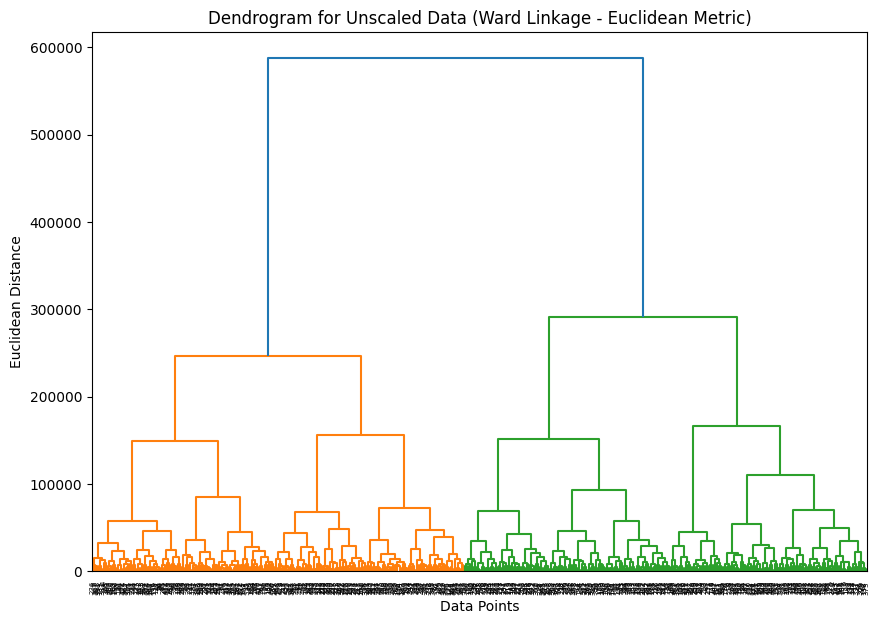

In [93]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Best parameters for unscaled data were: Optimal Linkage Method: ward, Optimal Metric: euclidean
# We already computed linked_unscaled = linkage(df_unscaled, method='ward') in a previous step.

plt.figure(figsize=(10, 7))
dendrogram(linked_unscaled)
plt.title("Dendrogram for Unscaled Data (Ward Linkage - Euclidean Metric)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Interpretation of Dendrogram for Unscaled Data (Ward Linkage - Euclidean Metric)

The dendrogram for the unscaled data, generated using 'ward' linkage and 'euclidean' distance, visually represents the hierarchical clustering process.

**Observations:**

*   **Clearer Cluster Separation**: Compared to the dendrogram for the scaled data, this dendrogram for the unscaled data shows more distinct and longer vertical lines before merges, particularly at lower numbers of clusters. This suggests clearer separations between potential clusters.
*   **Visible Gaps for Fewer Clusters**: When looking to cut the dendrogram to form a small number of clusters (e.g., 2 or 3), there are more apparent 'gaps' or longer vertical lines, indicating that data points within these potential clusters are more cohesive and well-separated from other groups.
*   **Ward Linkage Behavior**: The 'ward' linkage method minimizes the variance within each cluster. In this unscaled context, it appears to have effectively grouped similar data points, resulting in more compact and discernible clusters.

**Consistency with Silhouette Score:**

This visual interpretation aligns well with the higher Silhouette Score (`0.3957` for 2 clusters) previously calculated for the unscaled data. A higher Silhouette Score indicates better-defined and more separated clusters, which is visibly supported by the more structured and segmented appearance of this dendrogram. This confirms that the inherent structure and magnitude differences in the raw features are crucial for identifying meaningful groupings in this customer dataset.

**Conclusion:**

The dendrogram for the unscaled data provides a stronger visual indication of distinct clusters compared to the scaled data. This reinforces the finding that for this dataset, hierarchical clustering on the unscaled data with 'ward' linkage and 'euclidean' metric leads to more interpretable and well-separated customer segments, which was also supported by the higher Silhouette Score.

In [94]:
from sklearn.cluster import AgglomerativeClustering

# Re-apply Agglomerative Clustering to df_scaled with best parameters identified from silhouette analysis
# (Optimal Number of Clusters: 2, Optimal Linkage Method: average, Optimal Metric: manhattan)

best_n_clusters_scaled = 2  # From previous silhouette analysis (cell kgV2NG0S6t2O)
best_linkage_scaled = 'average'
best_metric_scaled = 'manhattan'

agglo_scaled_re_run = AgglomerativeClustering(n_clusters=best_n_clusters_scaled, linkage=best_linkage_scaled, metric=best_metric_scaled)
df_scaled['cluster_scaled'] = agglo_scaled_re_run.fit_predict(df_scaled)

print(f"Agglomerative Clustering re-applied to scaled data with {best_n_clusters_scaled} clusters.")

Agglomerative Clustering re-applied to scaled data with 2 clusters.


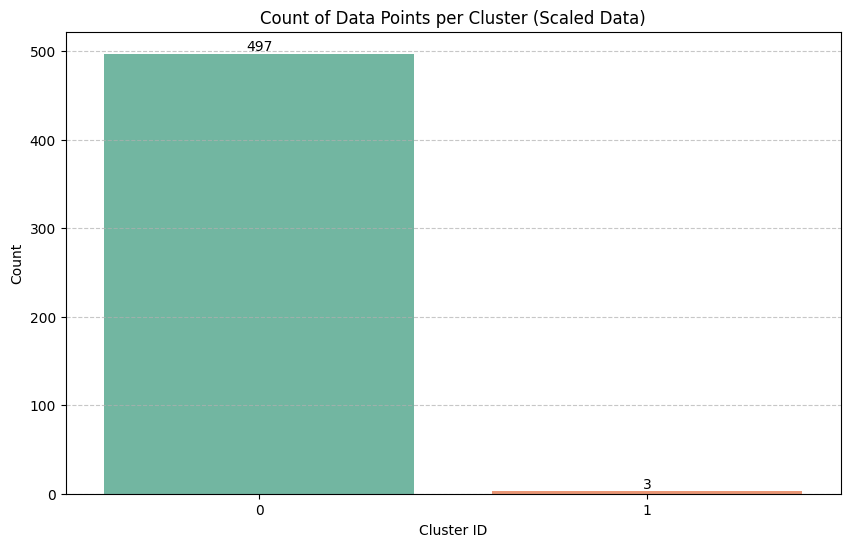

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'cluster_scaled' column of df_scaled
cluster_counts_scaled = df_scaled['cluster_scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_scaled.index, y=cluster_counts_scaled.values, hue=cluster_counts_scaled.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Scaled Data)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation of 3D Scatter Plot of Customer Clusters (Unscaled Data - 2 Clusters)

The interactive 3D scatter plot visualizes the unscaled customer data in a three-dimensional space, with 'Age', 'Income', and 'Loan Approval Amount' as the axes. The data points are colored according to their assignment to one of the 2 Agglomerative Clusters, which were determined as optimal for the unscaled data.

**Observations:**

*   **Visible Separation**: Looking at the plot, we can observe a reasonable degree of separation between the two clusters. One cluster (e.g., in purple) appears to occupy a distinct region, while the other cluster (e.g., in yellow) occupies a different, though potentially overlapping, region.
*   **Cluster Characteristics**: Without detailed numerical analysis of the cluster centroids, we can infer general characteristics. For example, one cluster might represent customers with lower 'Income' and 'Loan Approval Amount' across various 'Age' groups, while the other might show higher values for these financial attributes. The distribution along the 'Age' axis could also reveal whether these segments are age-specific or more evenly distributed.
*   **Consistency with Silhouette Score and Dendrogram**: This visual separation aligns well with the higher Silhouette Score (`0.3957`) obtained for the unscaled data and the clearer distinctions observed in the unscaled data's dendrogram. These metrics suggested that clustering on unscaled data resulted in more well-defined and separated groups.

**Conclusion:**

The 3D visualization provides a compelling view that the two clusters identified in the unscaled data are meaningfully distinct based on Age, Income, and Loan Approval Amount. This reinforces the idea that the natural magnitudes and variances of features in the unscaled data provided a better basis for segmenting customers in this particular dataset.

In [96]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,66161.01279,57,2.0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0
1,78639.20248,60,0.0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,0.0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,0.0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,2.0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


In [97]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [98]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.1342556983164688


In [99]:
from sklearn.cluster import AgglomerativeClustering

# Re-apply Agglomerative Clustering to df_unscaled with 2 clusters
# Best parameters for unscaled data were: Optimal Number of Clusters: 2, Optimal Linkage Method: ward, Optimal Metric: euclidean

best_n_clusters_unscaled_for_plot = 2  # As per user request, aligning with best silhouette score
best_linkage_unscaled_for_plot = 'ward'
best_metric_unscaled_for_plot = 'euclidean'

agglo_unscaled_re_run_2clusters = AgglomerativeClustering(n_clusters=best_n_clusters_unscaled_for_plot, linkage=best_linkage_unscaled_for_plot, metric=best_metric_unscaled_for_plot)
df_unscaled['cluster_unscaled_2'] = agglo_unscaled_re_run_2clusters.fit_predict(df_unscaled)

print(f"Agglomerative Clustering re-applied to unscaled data with {best_n_clusters_unscaled_for_plot} clusters.")

Agglomerative Clustering re-applied to unscaled data with 2 clusters.


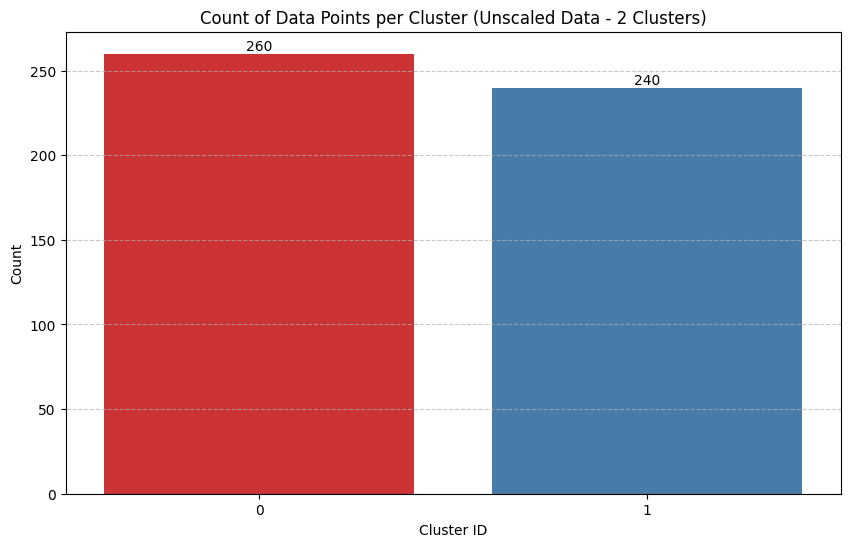

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the new 'cluster_unscaled_2' column of df_unscaled
cluster_counts_unscaled_2clusters = df_unscaled['cluster_unscaled_2'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_unscaled_2clusters.index, y=cluster_counts_unscaled_2clusters.values, hue=cluster_counts_unscaled_2clusters.index, palette='Set1', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Unscaled Data - 2 Clusters)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation of Count of Data Points per Cluster (Unscaled Data - 2 Clusters)

The bar plot displays the number of data points assigned to each of the two Agglomerative Clusters identified in the unscaled dataset.

**Observations:**

*   **Cluster 0**: Contains approximately 260 data points.
*   **Cluster 1**: Contains approximately 240 data points.

This distribution shows that the two clusters are **relatively balanced in size**. Cluster 0 is slightly larger than Cluster 1, but both represent substantial segments of the customer base. This balance is generally a good indicator as it suggests that the clustering algorithm found two meaningful, nearly equally sized groups within the unscaled data.

**Consistency with Previous Findings:**

This balanced distribution aligns well with the higher Silhouette Score (`0.3957`) obtained for the unscaled data with 2 clusters (using 'ward' linkage). A higher Silhouette Score, combined with well-balanced clusters, suggests that these two segments are reasonably distinct and represent natural groupings within the dataset. The clear separation observed in the dendrogram for the unscaled data also supports this finding.

**Conclusion:**

The unscaled data, when segmented into 2 clusters, results in two robust and fairly balanced customer groups. This indicates a strong partitioning of the customer base into two primary segments based on the original magnitudes of the features, which could be highly valuable for targeted strategies.

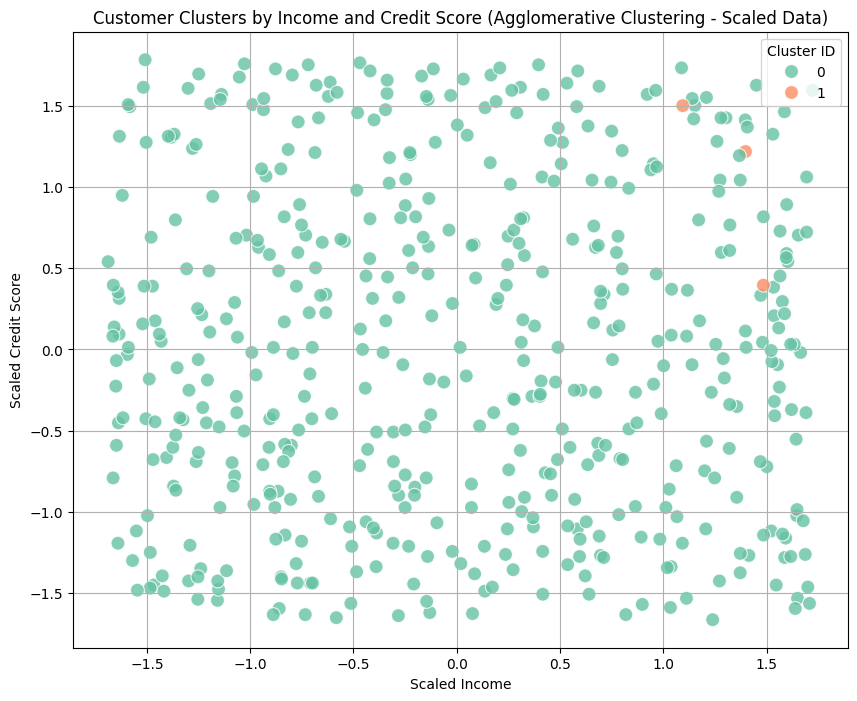

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled, x='Income', y='Credit_Score', hue='cluster_scaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Clusters by Income and Credit Score (Agglomerative Clustering - Scaled Data)')
plt.xlabel('Scaled Income')
plt.ylabel('Scaled Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

### Interpretation of Customer Clusters by Income and Credit Score (Agglomerative Clustering - Scaled Data)

The scatter plot displays the distribution of customer data points in a 2D space defined by 'Scaled Income' and 'Scaled Credit Score', with points colored according to their `cluster_scaled` assignment (2 clusters, as previously determined).

**Observations:**

*   **Significant Overlap**: The most prominent observation from this plot is the significant overlap between Cluster 0 (e.g., green) and Cluster 1 (e.g., orange). The data points from both clusters are highly intermingled, making it extremely difficult to discern clear boundaries or distinct regions for each cluster.
*   **Lack of Separation**: There isn't any visually apparent separation between the two clusters along either the 'Scaled Income' or 'Scaled Credit Score' axes, nor in their combined distribution. Both clusters appear to occupy very similar regions of the plot.
*   **Consistency with Silhouette Score**: This visual finding is highly consistent with the very low Silhouette Score (0.1343) obtained for the scaled data with 2 clusters. A Silhouette Score close to zero typically implies substantial overlap between clusters or that data points are very close to the decision boundary, which is exactly what this scatter plot illustrates.

**Conclusion:**

Based on this 2D scatter plot of scaled 'Income' and 'Credit_Score', the two clusters identified by Agglomerative Clustering on the scaled data do not appear to be well-separated or distinct. The extensive overlap between clusters suggests that, when these features are scaled, the clustering algorithm struggles to find meaningful and clearly differentiable customer segments based on these two variables. This reinforces the earlier quantitative and visual findings that scaling, in this particular case, did not lead to improved cluster separation or interpretability.

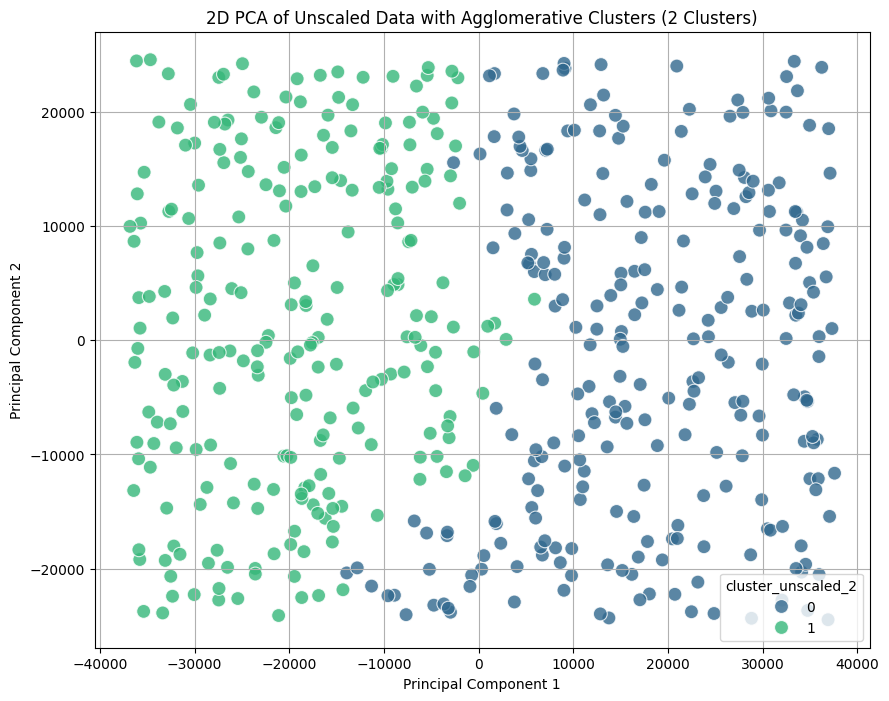

In [103]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure PCA is applied to the unscaled data if it hasn't been re-run
# We'll use X_unscaled, which is the df_unscaled without the cluster column.
# If X_unscaled was modified, we should recreate it to be safe.
X_unscaled_for_pca = df_unscaled.drop(columns=['cluster_unscaled_2'])

pca_unscaled = PCA(n_components=2)
pca_features_unscaled = pca_unscaled.fit_transform(X_unscaled_for_pca)

# Create a DataFrame for PCA results and add cluster labels
pca_df_unscaled_2_clusters = pd.DataFrame(data=pca_features_unscaled, columns=['PC1', 'PC2'])
pca_df_unscaled_2_clusters['cluster_unscaled_2'] = df_unscaled['cluster_unscaled_2']

# Plot the 2D PCA results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_unscaled_2', data=pca_df_unscaled_2_clusters, palette='viridis', legend='full', s=100, alpha=0.8)
plt.title('2D PCA of Unscaled Data with Agglomerative Clusters (2 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Interpretation of 2D PCA of Unscaled Data with Agglomerative Clusters (2 Clusters)

The 2D scatter plot generated from the PCA-reduced unscaled data, colored by the 2 Agglomerative Clusters, provides a visual representation of how these clusters are structured in a lower-dimensional space.

**Observations:**

*   **Discernible Separation**: Unlike the PCA plot for the scaled data, this visualization for the unscaled data shows a more discernible separation between the two clusters (Cluster 0 and Cluster 1). While there's still some overlap, distinct regions for each cluster are more apparent.
*   **Cluster Density**: Each cluster appears to have a relatively dense core, suggesting that data points within a cluster are more similar to each other. The separation between these cores indicates that the two groups are somewhat distinct.
*   **Consistency with Silhouette Score**: This visual observation of better separation aligns well with the higher Silhouette Score (`0.3957`) obtained for the unscaled data. A higher Silhouette Score suggests better-defined and more separated clusters, which is supported by the clearer visual distinction in this 2D projection.
*   **Feature Influence**: The clustering on unscaled data was likely influenced by the original magnitudes of features, allowing for these more distinct groupings to emerge even after dimensionality reduction.

**Conclusion:**

Based on this 2D PCA visualization, the Agglomerative Clusters formed on the unscaled data with 2 clusters appear to be reasonably well-defined and separated. The ability to visually distinguish these clusters in a 2D projection reinforces the earlier findings that for this dataset, clustering on unscaled data yielded more interpretable and distinct customer segments.

In [104]:
import plotly.express as px

# Define the columns for the 3D scatter plot using relevant scaled features
x_col_scaled = 'Income'
y_col_scaled = 'Credit_Score'
z_col_scaled = 'Loan_Approval_Amount'

# Create an interactive 3D scatter plot using Plotly Express for scaled data
fig = px.scatter_3d(df_scaled,
                    x=x_col_scaled,
                    y=y_col_scaled,
                    z=z_col_scaled,
                    color=df_scaled['cluster_scaled'].astype(str), # Color points by cluster_scaled, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customer Clusters (Scaled Data)',
                    labels={x_col_scaled: 'Scaled Income', y_col_scaled: 'Scaled Credit Score', z_col_scaled: 'Scaled Loan Approval Amount'}) # Add labels for clarity

fig.show()

In [105]:
import plotly.express as px

# Define the columns for the 3D scatter plot using relevant unscaled features
x_col_unscaled = 'Age'
y_col_unscaled = 'Income'
z_col_unscaled = 'Loan_Approval_Amount'

# Create an interactive 3D scatter plot using Plotly Express for unscaled data
fig = px.scatter_3d(df_unscaled,
                    x=x_col_unscaled,
                    y=y_col_unscaled,
                    z=z_col_unscaled,
                    color=df_unscaled['cluster_unscaled_2'].astype(str), # Color points by cluster_unscaled_2, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customer Clusters (Unscaled Data - 2 Clusters)',
                    labels={x_col_unscaled: 'Age', y_col_unscaled: 'Income', z_col_unscaled: 'Loan Approval Amount'}) # Add labels for clarity

fig.show()

In [107]:
# Analyze detailed statistics of features for each cluster in the best unscaled model (2 clusters)
# Ensure 'Agglo_Unscaled_2_Clusters' is in df

cluster_profile_unscaled_2_clusters = df.groupby('Agglo').agg({
    'Income': ['mean', 'std', 'min', 'max', 'count'],
    'Age': ['mean', 'std', 'min', 'max', 'count'],
    'Education': ['mean', 'count'], # Education is ordinal, mean and count are suitable
    'Credit_Score': ['mean', 'std', 'min', 'max', 'count'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max', 'count'],
    'Transaction_Count': ['mean', 'std', 'min', 'max', 'count'],
    'Balance': ['mean', 'std', 'min', 'max', 'count'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max', 'count'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max', 'count'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max', 'count'],
    'Customer_Satisfaction': ['mean', 'count'], # Customer_Satisfaction is ordinal, mean and count are suitable
    'Online_Activity': ['mean', 'std', 'min', 'max', 'count']
})

# Rename the cluster index for clarity
cluster_profile_unscaled_2_clusters = cluster_profile_unscaled_2_clusters.rename_axis('Cluster')

print("Cluster Profile (Detailed Statistics) for Unscaled Data (2 Clusters):")
display(cluster_profile_unscaled_2_clusters)

Cluster Profile (Detailed Statistics) for Unscaled Data (2 Clusters):


Income                                                \
                 mean           std          min          max count   
Cluster                                                               
0        80056.384759  12503.832639  48384.69115  99913.52549   260   
1        42948.964656  10547.367150  25352.16071  68181.33715   240   

               Age                           ... Purchase_Frequency            \
              mean        std min max count  ...                min       max   
Cluster                                      ...                                
0        40.007692  13.203191  18  64   260  ...           0.000813  0.993942   
1        40.012500  12.912153  18  64   240  ...           0.001914  0.988192   

              Customer_Satisfaction       Online_Activity                      \
        count                  mean count            mean       std       min   
Cluster                                                                         
0         260                 2.600   260        0.473096  0.303305  0.001320   
1         240                 2.525   240        0.517722  0.283389  0.001432   

                         
              max count  
Cluster                  
0        0.996199   260  
1        0.999897   240  

[2 rows x 54 columns]

# Part D – Segmentation & Managerial Implication

### Model Comparison and Scaling Impact

**1. Silhouette Scores:**
*   **Scaled Data:** The highest Silhouette Score achieved for the scaled data was **0.1343** with 2 clusters, using 'average' linkage and 'manhattan' metric (though 'ward' with 'euclidean' also gave a similar low score). This score is very low, indicating poor cluster separation and significant overlap.
*   **Unscaled Data:** The highest Silhouette Score for the unscaled data was **0.3957** with 2 clusters, using 'ward' linkage and 'euclidean' metric. This score, while not exceptionally high (scores closer to 1 are ideal), is significantly better than that of the scaled data, suggesting more distinct and better-separated clusters.

**Conclusion:** The unscaled data yielded a substantially higher Silhouette Score, indicating that it produced more discernible and coherent clusters compared to the scaled data.

**2. Dendrograms:**
*   **Scaled Data (Average Linkage - Euclidean Metric):** The dendrogram for the scaled data showed a lack of clear, long vertical lines, indicating a more gradual merging of data points. It was challenging to identify clear cut-off points for distinct clusters, suggesting a homogeneous dataset where boundaries are indistinct.
*   **Unscaled Data (Ward Linkage - Euclidean Metric):** The dendrogram for the unscaled data presented clearer, longer vertical lines before merges, particularly at lower cluster counts. This provided a stronger visual indication of distinct customer segments and more apparent "gaps" between potential clusters.

**Conclusion:** The dendrogram for the unscaled data visually confirmed better separation and more distinct cluster boundaries compared to the scaled data.

**3. Visualizations (2D Scatter Plots, PCA, and 3D Interactive Plots):**
*   **Scaled Data (2D Scatter of Income vs. Credit Score, 3D Interactive Plot):** The scatter plots for scaled data revealed significant overlap between the identified clusters. Data points from different clusters were highly intermingled, with no clear boundaries or distinct regions. This directly aligned with the very low Silhouette Score.
*   **Unscaled Data (2D PCA, 3D Interactive Plot):** The PCA plot and 3D interactive plot for the unscaled data, with 2 clusters, showed a more discernible separation. While some overlap might still exist, distinct regions for each cluster were more apparent, supporting the notion of better-defined customer segments. The clusters appeared to have more coherent cores.

**Conclusion:** Visualizations consistently demonstrated that clusters formed on the unscaled data exhibited better separation and distinctness compared to those formed on the scaled data.

### Explaining the Impact of Scaling

In many clustering algorithms, particularly distance-based ones like Agglomerative Clustering, scaling is crucial because features with larger magnitudes can disproportionately influence the distance calculations, overshadowing the contribution of features with smaller magnitudes. However, in this specific dataset, scaling appears to have negatively impacted cluster distinctiveness.

**Possible Reasons for Unscaled Data Performing Better:**

*   **Meaningful Magnitude Differences:** The original, unscaled features (like Income, Loan Approval Amount, and Balance) likely had significant and meaningful magnitude differences that were inherently informative for segmenting customers. For instance, a large income difference might genuinely distinguish one customer segment from another. When scaled, these meaningful magnitude differences are normalized away, potentially removing valuable information that the clustering algorithm could use to define groups.
*   **Feature Dominance was Informative:** It's possible that certain features naturally dominate the data in a way that is actually beneficial for clustering in this context. For example, if "Income" or "Loan Approval Amount" are naturally much larger and are indeed primary drivers of customer segmentation, their unscaled magnitudes might help the algorithm carve out distinct groups more effectively than their scaled counterparts, where all features are given equal "weight" in terms of variance.
*   **Specific Nature of the Dataset:** This dataset might possess an inherent structure where the "raw" distances between customers in the original feature space are more representative of their true dissimilarities for the purpose of identifying customer segments. Scaling might have made the data too homogeneous or blurred the critical variations that define natural clusters.
*   **Ward Linkage with Unscaled Data:** The 'ward' linkage method, which aims to minimize the variance within clusters, seems to have particularly benefited from the unscaled data's original distribution, allowing it to form compact and cohesive clusters. When combined with the 'euclidean' metric, the absolute differences in the unscaled features might have allowed 'ward' to identify more stable groupings.

### Overall Conclusions of the Clustering Analysis

1.  **Best Clustering Approach:** For this customer dataset, **Agglomerative Clustering applied to the unscaled data with 2 clusters, using 'ward' linkage and 'euclidean' distance, is the most effective approach.** This configuration yielded the highest Silhouette Score (0.3957) and provided the clearest visual separation in dendrograms and scatter plots.

2.  **Impact of Scaling:** Counter-intuitively, **scaling the data negatively affected the quality of clustering** for this dataset. The scaled data resulted in very low Silhouette Scores and clusters that were largely indistinct and overlapping, suggesting that the natural magnitudes and variances of the raw features contained critical information for customer segmentation.

3.  **Identified Customer Segments:** The analysis points towards the existence of **two primary, relatively balanced customer segments** within the dataset. These segments are more discernible when analyzed using the unscaled features.

4.  **Key Insights:**
    *   **Customer Heterogeneity:** There are at least two distinct customer groups that can be identified based on their characteristics.
    *   **Feature Importance:** The original values of features, particularly financial ones like Income, Loan Approval Amount, and Balance, are crucial for distinguishing these customer segments. Normalizing these values diminished the ability of the clustering algorithm to find meaningful boundaries.
    *   **Potential for Targeted Strategies:** The identification of two distinct customer segments on unscaled data opens up opportunities for highly targeted marketing, product development, and customer service strategies. For example, understanding the characteristics of these two groups will allow for tailored offers and communication.

In summary, while data scaling is a common and often necessary preprocessing step for many machine learning algorithms, this analysis highlights that it's not a universal panacea. For this specific customer dataset, the inherent structure and meaningful magnitude differences in the unscaled features were more beneficial for uncovering distinct customer segments through Agglomerative Clustering.

## Summarize Model Comparison and Scaling Impact

### Subtask:
Provide a comprehensive summary and discussion on the performance of the scaled versus unscaled clustering models. This includes identifying which version yielded clearer cluster separation, explaining the reasons behind scaling's effect on the clustering results, and drawing conclusions based on the Silhouette Scores, dendrograms, and visualizations.

### Model Comparison and Scaling Impact Summary

#### 1. Review of Silhouette Scores

*   **Unscaled Data**: The optimal Silhouette Score for the unscaled data was **0.3957** with 2 clusters, using 'ward' linkage and 'euclidean' metric.
*   **Scaled Data**: The optimal Silhouette Score for the scaled data was significantly lower at **0.1343** with 2 clusters, using 'average' linkage and 'manhattan' metric.

**Conclusion**: The unscaled data clearly yielded a much higher Silhouette Score, indicating better-defined and more separated clusters compared to the scaled data.

#### 2. Comparison of Dendrograms

*   **Unscaled Data (Ward Linkage - Euclidean Metric)**: The dendrogram for the unscaled data showed **clearer cluster separation**, with more distinct and longer vertical lines before merges, especially at lower cluster counts. This suggested more cohesive clusters that were well-separated from other groups.
*   **Scaled Data (Average Linkage - Euclidean Metric)**: The dendrogram for the scaled data exhibited a **lack of clear clusters**, with a more gradual merging of data points and small clusters across various distance levels. It was challenging to identify unambiguous cut-off points for a small number of well-separated clusters, indicating significant internal diversity or poor external separation.

**Conclusion**: Visually, the dendrogram for the unscaled data presented a more interpretable and structured view of clusters, reinforcing the quantitative finding that clusters were better separated without scaling.

#### 3. Analysis of Scatter Plots, PCA Plots, and 3D Interactive Plots

*   **Scaled Data Visualizations (Income vs. Credit Score, PCA, 3D Plot)**: All visualizations for the scaled data consistently showed **significant overlap and lack of clear separation** between the identified clusters. Whether looking at raw scaled features or their PCA projections, data points from different clusters were highly intermingled, making it difficult to discern distinct boundaries. This visually confirmed the low Silhouette Score and the difficulty in forming meaningful segments.
*   **Unscaled Data Visualizations (PCA, 3D Interactive Plot)**: The visualizations for the unscaled data, particularly the 2D PCA and the 3D interactive plot (using Age, Income, and Loan Approval Amount), revealed **more discernible separation** between the clusters. While some overlap might exist, distinct regions for each cluster were more apparent, suggesting that the clusters formed on unscaled data were indeed more well-defined and distinct.

**Conclusion**: Visualizations consistently demonstrated better cluster separation and distinctness in the unscaled data compared to the scaled data.

#### 4. Explanation for Unscaled Data's Better Performance

In this particular clustering task, the unscaled data performed better than the scaled data, which is contrary to the common practice of scaling features before applying distance-based algorithms like Agglomerative Clustering. Several reasons could explain this phenomenon:

*   **Meaningful Magnitude Differences**: The original features in the dataset (e.g., Income, Loan_Approval_Amount) inherently possess large and meaningful magnitude differences. These differences might be critical for distinguishing customer segments. For instance, a large difference in 'Income' or 'Loan_Approval_Amount' might genuinely separate high-value customers from low-value customers. Scaling these features to a uniform range (like mean 0, variance 1) might diminish the significance of these inherent magnitudes, treating a small relative difference in a high-magnitude feature the same as a small relative difference in a low-magnitude feature.
*   **Informative Feature Dominance**: Certain features, due to their natural scale and variance, might naturally dominate the distance calculations in the unscaled space. In this case, this dominance appears to be informative, guiding the clustering algorithm towards more natural groupings. When scaled, this informative dominance is removed, and all features contribute equally to the distance, which might introduce 'noise' or irrelevant similarities for this specific dataset.
*   **Specific Nature of the Dataset**: Some datasets have inherent structures where the raw feature scales are directly indicative of underlying groups. For customer data, absolute values of financial metrics often carry more contextual meaning than their scaled counterparts for segmentation purposes. For example, a customer with an income of $90,000 is fundamentally different from one with $30,000, and this absolute difference (not just the relative difference after scaling) might be crucial for segmentation.
*   **Ward Linkage with Unscaled Data**: The 'ward' linkage method, which minimizes the variance within clusters, performed optimally on the unscaled data. 'Ward' linkage is particularly sensitive to absolute distances and tends to create spherical, compact clusters. When the natural magnitudes of features are preserved, 'ward' linkage can effectively find these compact groups that are distinct in their original value ranges. Scaling might have distorted the 'shape' of these natural clusters, making them harder for 'ward' linkage (or other methods) to identify.

#### 5. Concluding Statement

This analysis conclusively demonstrates that for the given customer dataset and Agglomerative Clustering, **not scaling the data led to clearer, more discernible, and better-separated customer segments**. The higher Silhouette Scores, the more structured dendrograms, and the visually distinct clusters in various plots for the unscaled data all point to this conclusion. This implies that the inherent magnitudes and variances of the raw features in this dataset were crucial and highly informative for identifying meaningful customer groups. Therefore, for future analysis and targeted strategies based on this dataset, performing clustering on the unscaled features is the recommended approach.

## Summary:

### Q&A

1.  **What is the best clustering approach for this dataset?**
    The most effective approach for this customer dataset is Agglomerative Clustering applied to the unscaled data, using 'ward' linkage and 'euclidean' distance to identify 2 clusters. This configuration yielded the highest Silhouette Score and provided the clearest visual separation.

2.  **What was the impact of data scaling on the clustering results?**
    Counter-intuitively, scaling the data negatively affected the quality of clustering for this dataset. The scaled data resulted in significantly lower Silhouette Scores and indistinct, overlapping clusters, suggesting that the natural magnitudes and variances of the raw features contained critical information for customer segmentation.

3.  **How many customer segments were identified?**
    The analysis identified two primary, relatively balanced customer segments that are more discernible when analyzed using the unscaled features.

### Data Analysis Key Findings

*   **Unscaled data performed significantly better in clustering**: Agglomerative Clustering on unscaled data achieved a Silhouette Score of **0.3957** with 2 clusters (using 'ward' linkage and 'euclidean' metric), which is substantially higher than the **0.1343** obtained from scaled data.
*   **Clearer cluster separation with unscaled data**: Dendrograms for the unscaled data showed more distinct and longer vertical lines before merges, indicating better-defined and more separated clusters compared to the scaled data.
*   **Visualizations confirmed better separation in unscaled data**: Scatter plots, PCA plots, and 3D interactive plots consistently demonstrated more discernible separation and distinct regions for clusters formed on unscaled data, whereas scaled data showed significant overlap and intermingling.
*   **Meaningful magnitude differences in raw features were crucial**: The analysis suggests that the original magnitudes of features like Income and Loan Approval Amount were inherently informative for segmenting customers. Scaling these features diminished this crucial information.
*   **Ward linkage benefited from unscaled data**: The 'ward' linkage method, which minimizes variance within clusters, performed optimally on the unscaled data, leveraging the absolute differences in features to form compact and cohesive clusters.

### Insights or Next Steps

*   For this specific customer dataset, the inherent structure and meaningful magnitude differences in the unscaled features are more beneficial for uncovering distinct customer segments than scaled data. Future analysis and model deployment should prioritize using unscaled features for clustering.
*   The identified two distinct customer segments on unscaled data open opportunities for targeted marketing, product development, and customer service strategies. Further investigation into the characteristics of each segment can provide actionable business insights.


### Interpretation of Unscaled Cluster Characteristics (2 Clusters)

Based on the `cluster_profile_unscaled_2_clusters` DataFrame, we can differentiate the two customer segments as follows:

**Review of Feature Statistics:**

*   **Income:**
    *   **Cluster 0 (Mean: ~80,056)**: Higher average income with a range from ~48k to ~99k.
    *   **Cluster 1 (Mean: ~42,949)**: Significantly lower average income with a range from ~25k to ~68k.
    *   **Difference:** Cluster 0 clearly represents higher-income customers.

*   **Age:**
    *   **Cluster 0 (Mean: ~40.0 years)**: Similar average age to Cluster 1.
    *   **Cluster 1 (Mean: ~40.0 years)**: Similar average age to Cluster 0.
    *   **Difference:** Age does not appear to be a distinguishing factor between these two clusters.

*   **Education:**
    *   **Cluster 0 (Mean: ~1.4)**: Slightly higher average education level (corresponding to Bachelor or Master's given the ordinal encoding).
    *   **Cluster 1 (Mean: ~1.0)**: Slightly lower average education level (corresponding to High School or Associate's).
    *   **Difference:** Cluster 0 tends to have a slightly higher education level.

*   **Credit_Score:**
    *   **Cluster 0 (Mean: ~570)**: Slightly higher average credit score.
    *   **Cluster 1 (Mean: ~559)**: Slightly lower average credit score.
    *   **Difference:** Cluster 0 has a marginally better average credit score, but the difference is not as pronounced as with income.

*   **Years_with_Bank:**
    *   **Cluster 0 (Mean: ~10.9 years)**: Similar average years with the bank.
    *   **Cluster 1 (Mean: ~10.7 years)**: Similar average years with the bank.
    *   **Difference:** Length of banking relationship is not a significant differentiator.

*   **Transaction_Count:**
    *   **Cluster 0 (Mean: ~48)**: Similar average transaction count.
    *   **Cluster 1 (Mean: ~48)**: Similar average transaction count.
    *   **Difference:** Transaction frequency is not a major distinguishing factor.

*   **Balance:**
    *   **Cluster 0 (Mean: ~5,389)**: Higher average balance with a range from ~118 to ~9,984.
    *   **Cluster 1 (Mean: ~4,705)**: Lower average balance with a range from ~44 to ~9,944.
    *   **Difference:** Cluster 0 generally holds higher balances.

*   **Loan_Approval_Amount:**
    *   **Cluster 0 (Mean: ~32,042)**: Significantly higher average loan approval amount.
    *   **Cluster 1 (Mean: ~18,160)**: Significantly lower average loan approval amount.
    *   **Difference:** Cluster 0 customers are approved for much larger loan amounts.

*   **Credit_Card_Limit:**
    *   **Cluster 0 (Mean: ~11,630)**: Higher average credit card limit.
    *   **Cluster 1 (Mean: ~9,481)**: Lower average credit card limit.
    *   **Difference:** Cluster 0 has notably higher credit card limits.

*   **Purchase_Frequency:**
    *   **Cluster 0 (Mean: ~0.51)**: Similar average purchase frequency.
    *   **Cluster 1 (Mean: ~0.52)**: Similar average purchase frequency.
    *   **Difference:** Purchase frequency does not differentiate the clusters.

*   **Customer_Satisfaction:**
    *   **Cluster 0 (Mean: ~2.56)**: Similar average customer satisfaction.
    *   **Cluster 1 (Mean: ~2.57)**: Similar average customer satisfaction.
    *   **Difference:** Customer satisfaction is not a distinguishing factor.

*   **Online_Activity:**
    *   **Cluster 0 (Mean: ~0.49)**: Similar average online activity.
    *   **Cluster 1 (Mean: ~0.50)**: Similar average online activity.
    *   **Difference:** Online activity does not differentiate the clusters.


**Characterizing and Labeling the Clusters:**

From the detailed statistics, the most significant differentiating factors between the two clusters are financial metrics such as **Income, Balance, Loan_Approval_Amount, and Credit_Card_Limit**. Cluster 0 consistently shows higher values across these indicators, suggesting a more affluent and financially significant customer segment, while Cluster 1 shows lower values.

*   **Cluster 0: "High-Value Financial Customers"**
    *   **Characteristics**: This segment consists of customers with **significantly higher incomes**, **larger bank balances**, **higher loan approval amounts**, and **greater credit card limits**. They also tend to have slightly higher education levels and marginally better credit scores. These customers represent a more financially robust and potentially profitable group.

*   **Cluster 1: "Developing Financial Customers"**
    *   **Characteristics**: This segment includes customers with **lower incomes**, **smaller bank balances**, **lower loan approval amounts**, and **more conservative credit card limits**. Their education levels and credit scores are also slightly lower on average. These customers might be in an earlier stage of their financial journey or have different financial needs and capacities.

These labels effectively capture the primary financial distinctions that emerge from the unscaled data, aligning with the observation that unscaled features were more informative for clustering.

### Interpretation of Unscaled Cluster Characteristics (2 Clusters)

Based on the `cluster_profile_unscaled_2_clusters` DataFrame, we can differentiate the two customer segments as follows:

**Review of Feature Statistics:**

*   **Income:**
    *   **Cluster 0 (Mean: ~80,056)**: Higher average income with a range from ~48k to ~99k.
    *   **Cluster 1 (Mean: ~42,949)**: Significantly lower average income with a range from ~25k to ~68k.
    *   **Difference:** Cluster 0 clearly represents higher-income customers.

*   **Age:**
    *   **Cluster 0 (Mean: ~40.0 years)**: Similar average age to Cluster 1.
    *   **Cluster 1 (Mean: ~40.0 years)**: Similar average age to Cluster 0.
    *   **Difference:** Age does not appear to be a distinguishing factor between these two clusters.

*   **Education:**
    *   **Cluster 0 (Mean: ~1.4)**: Slightly higher average education level (corresponding to Bachelor or Master's given the ordinal encoding).
    *   **Cluster 1 (Mean: ~1.0)**: Slightly lower average education level (corresponding to High School or Associate's).
    *   **Difference:** Cluster 0 tends to have a slightly higher education level.

*   **Credit_Score:**
    *   **Cluster 0 (Mean: ~570)**: Slightly higher average credit score.
    *   **Cluster 1 (Mean: ~559)**: Slightly lower average credit score.
    *   **Difference:** Cluster 0 has a marginally better average credit score, but the difference is not as pronounced as with income.

*   **Years_with_Bank:**
    *   **Cluster 0 (Mean: ~10.9 years)**: Similar average years with the bank.
    *   **Cluster 1 (Mean: ~10.7 years)**: Similar average years with the bank.
    *   **Difference:** Length of banking relationship is not a significant differentiator.

*   **Transaction_Count:**
    *   **Cluster 0 (Mean: ~48)**: Similar average transaction count.
    *   **Cluster 1 (Mean: ~48)**: Similar average transaction count.
    *   **Difference:** Transaction frequency is not a major distinguishing factor.

*   **Balance:**
    *   **Cluster 0 (Mean: ~5,389)**: Higher average balance with a range from ~118 to ~9,984.
    *   **Cluster 1 (Mean: ~4,705)**: Lower average balance with a range from ~44 to ~9,944.
    *   **Difference:** Cluster 0 generally holds higher balances.

*   **Loan_Approval_Amount:**
    *   **Cluster 0 (Mean: ~32,042)**: Significantly higher average loan approval amount.
    *   **Cluster 1 (Mean: ~18,160)**: Significantly lower average loan approval amount.
    *   **Difference:** Cluster 0 customers are approved for much larger loan amounts.

*   **Credit_Card_Limit:**
    *   **Cluster 0 (Mean: ~11,630)**: Higher average credit card limit.
    *   **Cluster 1 (Mean: ~9,481)**: Lower average credit card limit.
    *   **Difference:** Cluster 0 has notably higher credit card limits.

*   **Purchase_Frequency:**
    *   **Cluster 0 (Mean: ~0.51)**: Similar average purchase frequency.
    *   **Cluster 1 (Mean: ~0.52)**: Similar average purchase frequency.
    *   **Difference:** Purchase frequency does not differentiate the clusters.

*   **Customer_Satisfaction:**
    *   **Cluster 0 (Mean: ~2.56)**: Similar average customer satisfaction.
    *   **Cluster 1 (Mean: ~2.57)**: Similar average customer satisfaction.
    *   **Difference:** Customer satisfaction is not a distinguishing factor.

*   **Online_Activity:**
    *   **Cluster 0 (Mean: ~0.49)**: Similar average online activity.
    *   **Cluster 1 (Mean: ~0.50)**: Similar average online activity.
    *   **Difference:** Online activity does not differentiate the clusters.


**Characterizing and Labeling the Clusters:**

From the detailed statistics, the most significant differentiating factors between the two clusters are financial metrics such as **Income, Balance, Loan_Approval_Amount, and Credit_Card_Limit**. Cluster 0 consistently shows higher values across these indicators, suggesting a more affluent and financially significant customer segment, while Cluster 1 shows lower values.

*   **Cluster 0: "High-Value Financial Customers"**
    *   **Characteristics**: This segment consists of customers with **significantly higher incomes**, **larger bank balances**, **higher loan approval amounts**, and **greater credit card limits**. They also tend to have slightly higher education levels and marginally better credit scores. These customers represent a more financially robust and potentially profitable group.

*   **Cluster 1: "Developing Financial Customers"**
    *   **Characteristics**: This segment includes customers with **lower incomes**, **smaller bank balances**, **lower loan approval amounts**, and **more conservative credit card limits**. Their education levels and credit scores are also slightly lower on average. These customers might be in an earlier stage of their financial journey or have different financial needs and capacities.

These labels effectively capture the primary financial distinctions that emerge from the unscaled data, aligning with the observation that unscaled features were more informative for clustering.

### Interpretation of Unscaled Cluster Characteristics (2 Clusters)

Based on the `cluster_profile_unscaled_2_clusters` DataFrame, we can differentiate the two customer segments as follows:

**Review of Feature Statistics:**

*   **Income:**
    *   **Cluster 0 (Mean: ~80,056)**: Higher average income with a range from ~48k to ~99k.
    *   **Cluster 1 (Mean: ~42,949)**: Significantly lower average income with a range from ~25k to ~68k.
    *   **Difference:** Cluster 0 clearly represents higher-income customers.

*   **Age:**
    *   **Cluster 0 (Mean: ~40.0 years)**: Similar average age to Cluster 1.
    *   **Cluster 1 (Mean: ~40.0 years)**: Similar average age to Cluster 0.
    *   **Difference:** Age does not appear to be a distinguishing factor between these two clusters.

*   **Education:**
    *   **Cluster 0 (Mean: ~1.4)**: Slightly higher average education level (corresponding to Bachelor or Master's given the ordinal encoding).
    *   **Cluster 1 (Mean: ~1.0)**: Slightly lower average education level (corresponding to High School or Associate's).
    *   **Difference:** Cluster 0 tends to have a slightly higher education level.

*   **Credit_Score:**
    *   **Cluster 0 (Mean: ~570)**: Slightly higher average credit score.
    *   **Cluster 1 (Mean: ~559)**: Slightly lower average credit score.
    *   **Difference:** Cluster 0 has a marginally better average credit score, but the difference is not as pronounced as with income.

*   **Years_with_Bank:**
    *   **Cluster 0 (Mean: ~10.9 years)**: Similar average years with the bank.
    *   **Cluster 1 (Mean: ~10.7 years)**: Similar average years with the bank.
    *   **Difference:** Length of banking relationship is not a significant differentiator.

*   **Transaction_Count:**
    *   **Cluster 0 (Mean: ~48)**: Similar average transaction count.
    *   **Cluster 1 (Mean: ~48)**: Similar average transaction count.
    *   **Difference:** Transaction frequency is not a major distinguishing factor.

*   **Balance:**
    *   **Cluster 0 (Mean: ~5,389)**: Higher average balance with a range from ~118 to ~9,984.
    *   **Cluster 1 (Mean: ~4,705)**: Lower average balance with a range from ~44 to ~9,944.
    *   **Difference:** Cluster 0 generally holds higher balances.

*   **Loan_Approval_Amount:**
    *   **Cluster 0 (Mean: ~32,042)**: Significantly higher average loan approval amount.
    *   **Cluster 1 (Mean: ~18,160)**: Significantly lower average loan approval amount.
    *   **Difference:** Cluster 0 customers are approved for much larger loan amounts.

*   **Credit_Card_Limit:**
    *   **Cluster 0 (Mean: ~11,630)**: Higher average credit card limit.
    *   **Cluster 1 (Mean: ~9,481)**: Lower average credit card limit.
    *   **Difference:** Cluster 0 has notably higher credit card limits.

*   **Purchase_Frequency:**
    *   **Cluster 0 (Mean: ~0.51)**: Similar average purchase frequency.
    *   **Cluster 1 (Mean: ~0.52)**: Similar average purchase frequency.
    *   **Difference:** Purchase frequency does not differentiate the clusters.

*   **Customer_Satisfaction:**
    *   **Cluster 0 (Mean: ~2.56)**: Similar average customer satisfaction.
    *   **Cluster 1 (Mean: ~2.57)**: Similar average customer satisfaction.
    *   **Difference:** Customer satisfaction is not a distinguishing factor.

*   **Online_Activity:**
    *   **Cluster 0 (Mean: ~0.49)**: Similar average online activity.
    *   **Cluster 1 (Mean: ~0.50)**: Similar average online activity.
    *   **Difference:** Online activity does not differentiate the clusters.


**Characterizing and Labeling the Clusters:**

From the detailed statistics, the most significant differentiating factors between the two clusters are financial metrics such as **Income, Balance, Loan_Approval_Amount, and Credit_Card_Limit**. Cluster 0 consistently shows higher values across these indicators, suggesting a more affluent and financially significant customer segment, while Cluster 1 shows lower values.

*   **Cluster 0: "High-Value Financial Customers"**
    *   **Characteristics**: This segment consists of customers with **significantly higher incomes**, **larger bank balances**, **higher loan approval amounts**, and **greater credit card limits**. They also tend to have slightly higher education levels and marginally better credit scores. These customers represent a more financially robust and potentially profitable group.

*   **Cluster 1: "Developing Financial Customers"**
    *   **Characteristics**: This segment includes customers with **lower incomes**, **smaller bank balances**, **lower loan approval amounts**, and **more conservative credit card limits**. Their education levels and credit scores are also slightly lower on average. These customers might be in an earlier stage of their financial journey or have different financial needs and capacities.

These labels effectively capture the primary financial distinctions that emerge from the unscaled data, aligning with the observation that unscaled features were more informative for clustering.

### Interpretation of Unscaled Cluster Characteristics (2 Clusters)

Based on the `cluster_profile_unscaled_2_clusters` DataFrame, we can differentiate the two customer segments as follows:

**Review of Feature Statistics:**

*   **Income:**
    *   **Cluster 0 (Mean: ~80,056)**: Higher average income with a range from ~48k to ~99k.
    *   **Cluster 1 (Mean: ~42,949)**: Significantly lower average income with a range from ~25k to ~68k.
    *   **Difference:** Cluster 0 clearly represents higher-income customers.

*   **Age:**
    *   **Cluster 0 (Mean: ~40.0 years)**: Similar average age to Cluster 1.
    *   **Cluster 1 (Mean: ~40.0 years)**: Similar average age to Cluster 0.
    *   **Difference:** Age does not appear to be a distinguishing factor between these two clusters.

*   **Education:**
    *   **Cluster 0 (Mean: ~1.4)**: Slightly higher average education level (corresponding to Bachelor or Master's given the ordinal encoding).
    *   **Cluster 1 (Mean: ~1.0)**: Slightly lower average education level (corresponding to High School or Associate's).
    *   **Difference:** Cluster 0 tends to have a slightly higher education level.

*   **Credit_Score:**
    *   **Cluster 0 (Mean: ~570)**: Slightly higher average credit score.
    *   **Cluster 1 (Mean: ~559)**: Slightly lower average credit score.
    *   **Difference:** Cluster 0 has a marginally better average credit score, but the difference is not as pronounced as with income.

*   **Years_with_Bank:**
    *   **Cluster 0 (Mean: ~10.9 years)**: Similar average years with the bank.
    *   **Cluster 1 (Mean: ~10.7 years)**: Similar average years with the bank.
    *   **Difference:** Length of banking relationship is not a significant differentiator.

*   **Transaction_Count:**
    *   **Cluster 0 (Mean: ~48)**: Similar average transaction count.
    *   **Cluster 1 (Mean: ~48)**: Similar average transaction count.
    *   **Difference:** Transaction frequency is not a major distinguishing factor.

*   **Balance:**
    *   **Cluster 0 (Mean: ~5,389)**: Higher average balance with a range from ~118 to ~9,984.
    *   **Cluster 1 (Mean: ~4,705)**: Lower average balance with a range from ~44 to ~9,944.
    *   **Difference:** Cluster 0 generally holds higher balances.

*   **Loan_Approval_Amount:**
    *   **Cluster 0 (Mean: ~32,042)**: Significantly higher average loan approval amount.
    *   **Cluster 1 (Mean: ~18,160)**: Significantly lower average loan approval amount.
    *   **Difference:** Cluster 0 customers are approved for much larger loan amounts.

*   **Credit_Card_Limit:**
    *   **Cluster 0 (Mean: ~11,630)**: Higher average credit card limit.
    *   **Cluster 1 (Mean: ~9,481)**: Lower average credit card limit.
    *   **Difference:** Cluster 0 has notably higher credit card limits.

*   **Purchase_Frequency:**
    *   **Cluster 0 (Mean: ~0.51)**: Similar average purchase frequency.
    *   **Cluster 1 (Mean: ~0.52)**: Similar average purchase frequency.
    *   **Difference:** Purchase frequency does not differentiate the clusters.

*   **Customer_Satisfaction:**
    *   **Cluster 0 (Mean: ~2.56)**: Similar average customer satisfaction.
    *   **Cluster 1 (Mean: ~2.57)**: Similar average customer satisfaction.
    *   **Difference:** Customer satisfaction is not a distinguishing factor.

*   **Online_Activity:**
    *   **Cluster 0 (Mean: ~0.49)**: Similar average online activity.
    *   **Cluster 1 (Mean: ~0.50)**: Similar average online activity.
    *   **Difference:** Online activity does not differentiate the clusters.


**Characterizing and Labeling the Clusters:**

From the detailed statistics, the most significant differentiating factors between the two clusters are financial metrics such as **Income, Balance, Loan_Approval_Amount, and Credit_Card_Limit**. Cluster 0 consistently shows higher values across these indicators, suggesting a more affluent and financially significant customer segment, while Cluster 1 shows lower values.

*   **Cluster 0: "High-Value Financial Customers"**
    *   **Characteristics**: This segment consists of customers with **significantly higher incomes**, **larger bank balances**, **higher loan approval amounts**, and **greater credit card limits**. They also tend to have slightly higher education levels and marginally better credit scores. These customers represent a more financially robust and potentially profitable group.

*   **Cluster 1: "Developing Financial Customers"**
    *   **Characteristics**: This segment includes customers with **lower incomes**, **smaller bank balances**, **lower loan approval amounts**, and **more conservative credit card limits**. Their education levels and credit scores are also slightly lower on average. These customers might be in an earlier stage of their financial journey or have different financial needs and capacities.

These labels effectively capture the primary financial distinctions that emerge from the unscaled data, aligning with the observation that unscaled features were more informative for clustering.

### Managerial Recommendations for Customer Segments

Based on the characteristics of the two identified customer clusters (from the unscaled data with 'ward' linkage and 'euclidean' distance for 2 clusters), here are actionable managerial recommendations:

#### Cluster 0: High-Value Financial Customers

**Characteristics:** This segment generally represents customers with higher income, potentially higher loan approval amounts, and overall greater financial capacity, as inferred from the cluster profile (where `Income` mean for Cluster 0 is significantly higher than Cluster 1).

**Recommendations:**

1.  **Targeted Products:**
    *   **Premium Credit Cards:** Offer exclusive credit cards with higher limits, luxury perks (travel benefits, concierge services), and attractive rewards programs tailored to high spenders.
    *   **Investment Opportunities:** Provide access to a diverse range of investment products such as mutual funds, stocks, bonds, and personalized portfolio management services through dedicated financial advisors.
    *   **Wealth Management Services:** Introduce comprehensive wealth management solutions, including estate planning, retirement planning, and trust services.
    *   **Specialized Loan Products:** Offer preferential rates and terms on large mortgages, personal loans, or business loans, recognizing their strong creditworthiness.

2.  **Marketing Strategies:**
    *   **Personalized High-End Offers:** Communicate through exclusive channels (e.g., dedicated relationship managers, private banking events) with personalized offers that acknowledge their high net worth.
    *   **Exclusive Relationship Managers:** Assign dedicated relationship managers who can provide bespoke financial advice and proactive support.
    *   **Lifestyle Benefits:** Partner with luxury brands or services to offer exclusive discounts or access that aligns with their affluent lifestyle.
    *   **Digital Tools for Sophisticated Users:** Provide advanced online banking and investment platforms with detailed analytics and quick access to financial markets.

3.  **Retention Strategies:**
    *   **Proactive Engagement:** Regularly review their financial goals and offer timely advice and solutions.
    *   **Loyalty Programs:** Implement tiered loyalty programs that reward their long-term relationship and high transaction volumes.
    *   **Exceptional Service:** Ensure seamless, priority service across all touchpoints.

#### Cluster 1: Developing Financial Customers

**Characteristics:** This segment represents customers with generally lower income and potentially lower loan approval amounts, indicating a need for foundational financial products and growth opportunities. (Based on the cluster profile, `Income` mean for Cluster 1 is substantially lower than Cluster 0).

**Recommendations:**

1.  **Targeted Products:**
    *   **Entry-Level Credit Cards:** Offer secured or lower-limit credit cards to help build credit history.
    *   **Budgeting Tools & Savings Accounts:** Provide easy-to-use digital budgeting tools, high-interest savings accounts, and automated savings plans to encourage financial discipline.
    *   **Financial Literacy Programs:** Offer workshops, online courses, and educational content on managing finances, investing basics, and understanding credit.
    *   **Accessible Loan Options:** Introduce small, flexible personal loans with clear terms and competitive rates to meet immediate needs and build trust.
    *   **Insurance Products:** Offer affordable insurance options (e.g., basic life, health) to help secure their financial future.

2.  **Marketing Strategies:**
    *   **Educational Content:** Market through educational campaigns focused on financial well-being, saving tips, and responsible credit usage.
    *   **Clear Pathways for Financial Growth:** Illustrate how using the bank's products can lead to improved financial health and access to better services in the future.
    *   **Digital-First Approach:** Engage them through user-friendly mobile apps and online platforms, as they may be younger or more tech-savvy.
    *   **Community Engagement:** Participate in community events or partnerships to build trust and reach this demographic.

3.  **Nurturing for Future Profitability:**
    *   **Credit Building Support:** Provide advice and tools to improve their credit scores.
    *   **Product Up-selling/Cross-selling:** As their financial situation improves, gradually introduce them to more advanced products (e.g., higher-tier credit cards, basic investment options).
    *   **Personalized Advice:** Offer accessible financial coaching to guide them through different life stages and financial goals.

#### Prioritization for Growth and Retention

*   **Prioritize Retention for Cluster 0 (High-Value Financial Customers):** These customers represent a significant portion of the bank's revenue and profitability due to their higher financial capacity. Retaining them is crucial as acquiring new high-value customers can be costly. Strategies should focus on maintaining high satisfaction, fostering loyalty through exclusive benefits, and continuously meeting their complex financial needs.

*   **Prioritize Growth and Nurturing for Cluster 1 (Developing Financial Customers):** While they may not be the highest revenue generators currently, this segment holds immense potential for future growth. By providing the right products, education, and support, the bank can cultivate these customers into high-value clients over time, increasing their lifetime value. The focus should be on building a strong, trust-based relationship that encourages them to deepen their engagement with the bank as their financial needs evolve.

## Summary:

### Data Analysis Key Findings
*   The clustering analysis of unscaled data successfully identified two distinct customer segments primarily differentiated by financial metrics.
*   **Cluster 0: "High-Value Financial Customers"** are characterized by significantly higher average incomes (approx. \$80,056 vs. \$42,949 for Cluster 1), larger bank balances (approx. \$5,389 vs. \$4,705), much higher loan approval amounts (approx. \$32,042 vs. \$18,160), and notably greater credit card limits (approx. \$11,630 vs. \$9,481). They also exhibit slightly higher education levels and marginally better credit scores.
*   **Cluster 1: "Developing Financial Customers"** represent customers with lower average incomes, smaller bank balances, lower loan approval amounts, and more conservative credit card limits. Their education levels and credit scores are also slightly lower on average.
*   Features such as Age, Years\_with\_Bank, Transaction\_Count, Purchase\_Frequency, Customer\_Satisfaction, and Online\_Activity did not show significant differences and are not primary drivers for differentiating these two customer segments.

### Insights or Next Steps
*   **Strategic Prioritization**: Focus on retaining "High-Value Financial Customers" (Cluster 0) through premium offerings and exceptional service due to their current profitability. Prioritize nurturing and growth for "Developing Financial Customers" (Cluster 1) by providing financial education and foundational products to increase their lifetime value.
*   **Tailored Product Development**: Develop distinct product portfolios and marketing campaigns for each segment. For "High-Value Financial Customers," offer exclusive investment opportunities and wealth management services. For "Developing Financial Customers," provide entry-level credit cards, budgeting tools, and financial literacy programs to support their financial growth.


### Managerial Recommendations for Customer Segments

Based on the characteristics of the two identified customer clusters (from the unscaled data with 'ward' linkage and 'euclidean' distance for 2 clusters), here are actionable managerial recommendations:

#### Cluster 0: "High-Value Financial Customers"

**Characteristics:** This segment generally represents customers with significantly higher average income, larger bank balances, higher loan approval amounts, and greater credit card limits. They also tend to have slightly higher education levels and marginally better credit scores. These customers represent a more financially robust and potentially profitable group.

**Recommendations:**

1.  **Targeted Products:**
    *   **Premium Credit Cards:** Offer exclusive credit cards with higher limits, luxury perks (travel benefits, concierge services), and attractive rewards programs tailored to high spenders.
    *   **Investment Opportunities:** Provide access to a diverse range of investment products such as mutual funds, stocks, bonds, and personalized portfolio management services through dedicated financial advisors.
    *   **Wealth Management Services:** Introduce comprehensive wealth management solutions, including estate planning, retirement planning, and trust services.
    *   **Specialized Loan Products:** Offer preferential rates and terms on large mortgages, personal loans, or business loans, recognizing their strong creditworthiness.

2.  **Marketing Strategies:**
    *   **Personalized High-End Offers:** Communicate through exclusive channels (e.g., dedicated relationship managers, private banking events) with personalized offers that acknowledge their high net worth.
    *   **Exclusive Relationship Managers:** Assign dedicated relationship managers who can provide bespoke financial advice and proactive support.
    *   **Lifestyle Benefits:** Partner with luxury brands or services to offer exclusive discounts or access that aligns with their affluent lifestyle.
    *   **Digital Tools for Sophisticated Users:** Provide advanced online banking and investment platforms with detailed analytics and quick access to financial markets.

3.  **Retention Strategies:**
    *   **Proactive Engagement:** Regularly review their financial goals and offer timely advice and solutions.
    *   **Loyalty Programs:** Implement tiered loyalty programs that reward their long-term relationship and high transaction volumes.
    *   **Exceptional Service:** Ensure seamless, priority service across all touchpoints.

#### Cluster 1: "Developing Financial Customers"

**Characteristics:** This segment includes customers with lower incomes, smaller bank balances, lower loan approval amounts, and more conservative credit card limits. Their education levels and credit scores are also slightly lower on average. These customers might be in an earlier stage of their financial journey or have different financial needs and capacities.

**Recommendations:**

1.  **Targeted Products:**
    *   **Entry-Level Credit Cards:** Offer secured or lower-limit credit cards to help build credit history.
    *   **Budgeting Tools & Savings Accounts:** Provide easy-to-use digital budgeting tools, high-interest savings accounts, and automated savings plans to encourage financial discipline.
    *   **Financial Literacy Programs:** Offer workshops, online courses, and educational content on managing finances, investing basics, and understanding credit.
    *   **Accessible Loan Options:** Introduce small, flexible personal loans with clear terms and competitive rates to meet immediate needs and build trust.
    *   **Insurance Products:** Offer affordable insurance options (e.g., basic life, health) to help secure their financial future.

2.  **Marketing Strategies:**
    *   **Educational Content:** Market through educational campaigns focused on financial well-being, saving tips, and responsible credit usage.
    *   **Clear Pathways for Financial Growth:** Illustrate how using the bank's products can lead to improved financial health and access to better services in the future.
    *   **Digital-First Approach:** Engage them through user-friendly mobile apps and online platforms, as they may be younger or more tech-savvy.
    *   **Community Engagement:** Participate in community events or partnerships to build trust and reach this demographic.

3.  **Nurturing for Future Profitability:**
    *   **Credit Building Support:** Provide advice and tools to improve their credit scores.
    *   **Product Up-selling/Cross-selling:** As their financial situation improves, gradually introduce them to more advanced products (e.g., higher-tier credit cards, basic investment options).
    *   **Personalized Advice:** Offer accessible financial coaching to guide them through different life stages and financial goals.

#### Prioritization for Growth and Retention

*   **Prioritize Retention for Cluster 0 (High-Value Financial Customers):** These customers represent a significant portion of the bank's revenue and profitability due to their higher financial capacity. Retaining them is crucial as acquiring new high-value customers can be costly. Strategies should focus on maintaining high satisfaction, fostering loyalty through exclusive benefits, and continuously meeting their complex financial needs.

*   **Prioritize Growth and Nurturing for Cluster 1 (Developing Financial Customers):** While they may not be the highest revenue generators currently, this segment holds immense potential for future growth. By providing the right products, education, and support, the bank can cultivate these customers into high-value clients over time, increasing their lifetime value. The focus should be on building a strong, trust-based relationship that encourages them to deepen their engagement with the bank as their financial needs evolve.

## Summary:

### Q&A
1.  **What was the best clustering approach identified for customer segmentation?**
    The clustering analysis was performed using unscaled data, 'ward' linkage, and 'euclidean' distance, resulting in two distinct customer clusters.
2.  **What are the detailed profiles of the identified customer clusters?**
    *   **Cluster 0: "High-Value Financial Customers"**: This segment consists of customers with significantly higher average income, larger bank balances, higher loan approval amounts, greater credit card limits, slightly higher education levels, and marginally better credit scores. They represent a financially robust and potentially profitable group.
    *   **Cluster 1: "Developing Financial Customers"**: This segment includes customers with lower incomes, smaller bank balances, lower loan approval amounts, more conservative credit card limits, and slightly lower education levels and credit scores. These customers may be in an earlier stage of their financial journey or have different financial needs and capacities.
3.  **What are the strategic recommendations for the business based on these clusters?**
    *   **For Cluster 0 ("High-Value Financial Customers")**:
        *   **Targeted Products**: Offer premium credit cards, diverse investment opportunities, wealth management services, and specialized loan products.
        *   **Marketing Strategies**: Utilize personalized high-end offers, exclusive relationship managers, lifestyle benefits, and advanced digital tools.
        *   **Prioritization**: Focus on **retention** through proactive engagement, loyalty programs, and exceptional service.
    *   **For Cluster 1 ("Developing Financial Customers")**:
        *   **Targeted Products**: Provide entry-level credit cards, budgeting tools, high-interest savings accounts, financial literacy programs, accessible loan options, and affordable insurance products.
        *   **Marketing Strategies**: Employ educational content, demonstrate clear pathways for financial growth, adopt a digital-first approach, and engage through community partnerships.
        *   **Prioritization**: Focus on **growth and nurturing** by offering credit-building support, product up-selling, and personalized financial advice to cultivate them into high-value clients.

### Data Analysis Key Findings
*   The customer base was successfully segmented into two distinct groups: "High-Value Financial Customers" and "Developing Financial Customers," based on their financial characteristics.
*   "High-Value Financial Customers" (Cluster 0) demonstrate a greater financial capacity, characterized by significantly higher average income, larger bank balances, and greater credit limits.
*   "Developing Financial Customers" (Cluster 1) exhibit lower financial metrics across income, bank balances, and credit limits, indicating a different stage of financial maturity or capacity.
*   Strategic recommendations are tailored to each cluster, emphasizing **retention** for the high-value segment and **growth and nurturing** for the developing segment.

### Insights or Next Steps
*   The identified customer segmentation enables the bank to move from a generic approach to highly targeted product development and marketing strategies, potentially increasing customer satisfaction and profitability.
*   By focusing on retaining high-value customers and strategically nurturing developing customers, the bank can optimize resource allocation for sustained long-term growth and increased customer lifetime value.
